Citibike data for Tableau
Module 18 Homework
Chris Gruenhagen

Data Plan:
 - download JC-YYYYMM-citibike-tripdata.csv.zip files from 2015-09 to 2022-12
 - read csvs from 2015-09 to 2021-01 into one pandas DataFrame (csvs with dataformat1)
 - read csvs from 2021-02 into a second pandas DataFrame (csvs with dataformat2)

Idea: loop
    - create lists
        * ldata1
        * ldata2
    - open csv into df
    - if csv[0]header == 'Trip Duration', append to ldata1
    - elif csv[0]header == 'Ride ID', append to ldata2
    end loop
    then loop through list1 and concatenate into bigdf1, loop through list2 and concatenate into bigdf2


dataformat1
    Trip Duration (seconds)
    Start Time and Date
    Stop Time and Date
    Start Station Name
    End Station Name
    Station ID
    Station Lat/Long
    Bike ID
    User Type (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member)
    Gender (Zero=unknown; 1=male; 2=female)
    Year of Birth

dataformat2
    Ride ID
    Rideable type
    Started at
    Ended at
    Start station name
    Start station ID
    End station name
    End station ID
    Start latitude
    Start longitude
    End latitude
    End Longitude
    Member or casual ride


DOWNLOAD DATA
references

https://stackoverflow.com/questions/67284489/how-to-load-a-csv-file-from-zipped-folder-from-url-into-pandas-dataframe?noredirect=1&lq=1

https://stackoverflow.com/questions/3461111/unzipping-files-in-python

In [1]:
# Import dependencies
import zipfile
from urllib.request import urlopen
import shutil
import os
import pandas as pd


# Import dependencies
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager


import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
# import mplcursors
import pandas as pd
from datetime import datetime
from datetime import timezone
import numpy as np
# import os

import glob
import time
import requests
import bs4

In [7]:
#  # USED TO PULL DATA FROM WEBSITE - DO NOT NEED TO RERUN IF CSVs are in Resources directory
# baseurl = 'https://s3.amazonaws.com/tripdata/'

In [8]:
#  # USED TO PULL DATA FROM WEBSITE - DO NOT NEED TO RERUN IF CSVs are in Resources directory
# indexurl = 'https://s3.amazonaws.com/tripdata/index.html'

In [9]:
#  # USED TO PULL DATA FROM WEBSITE - DO NOT NEED TO RERUN IF CSVs are in Resources directory
# # this opens the test browser
# executable_path = {'executable_path': ChromeDriverManager().install()}
# browser = Browser('chrome', **executable_path, headless=False)


[WDM] - Downloading: 100%|██████████| 6.78M/6.78M [00:29<00:00, 242kB/s]


In [12]:
#  # USED TO PULL DATA FROM WEBSITE - DO NOT NEED TO RERUN IF CSVs are in Resources directory
# #scrape list of zip files from 'https://s3.amazonaws.com/tripdata/index.html'
# browser.visit(indexurl)
# time.sleep(6)
# html = browser.html
# tablelist = pd.read_html(html)
# tabledffy = tablelist[0]
# print(tabledffy.head(2))
# print(len(tabledffy))

                                  Name               Date Modified       Size  \
0         201306-citibike-tripdata.zip  Apr 30th 2018, 08:18:55 am   16.79 MB   
1  201307-201402-citibike-tripdata.zip  Jan 18th 2017, 04:23:25 pm  178.26 MB   

       Type  
0  ZIP file  
1  ZIP file  
207


In [13]:
#  # USED TO PULL DATA FROM WEBSITE - DO NOT NEED TO RERUN IF CSVs are in Resources directory - pull years 2018-2022
# tabledf = tabledffy.loc[(tabledffy["Name"].str.contains('2018'))|(tabledffy["Name"].str.contains('2019'))|(tabledffy["Name"].str.contains('2020'))|(tabledffy["Name"].str.contains('2021'))|(tabledffy["Name"].str.contains('2022'))]
# print(tabledf.head(2))
# print(len(tabledf))

                                Name              Date Modified      Size  \
56  201801-citibike-tripdata.csv.zip  Sep 6th 2018, 01:44:00 pm  23.24 MB   
57  201802-citibike-tripdata.csv.zip  Sep 6th 2018, 01:44:02 pm  27.45 MB   

        Type  
56  ZIP file  
57  ZIP file  
120


In [19]:
#  # USED TO PULL DATA FROM WEBSITE - DO NOT NEED TO RERUN IF CSVs are in Resources directory
# # select subset of data from pandas dataframe where Name contains JC


# JCzips = tabledf.loc[tabledf["Name"].str.contains('JC')]
# print(JCzips[0:2])

                                    Name              Date Modified    Size  \
145  JC-201801-citibike-tripdata.csv.zip  Sep 6th 2018, 01:44:38 pm  328 KB   
146  JC-201802-citibike-tripdata.csv.zip  Sep 6th 2018, 01:44:38 pm  389 KB   

         Type  
145  ZIP file  
146  ZIP file  


In [20]:
#  # USED TO PULL DATA FROM WEBSITE - DO NOT NEED TO RERUN IF CSVs are in Resources directory
# # select subset of data from pandas dataframe for NY data where name does NOT contain JC
# NYzips = tabledf.loc[~tabledf["Name"].str.contains('JC')]
# print(NYzips[0:2])

                                Name              Date Modified      Size  \
56  201801-citibike-tripdata.csv.zip  Sep 6th 2018, 01:44:00 pm  23.24 MB   
57  201802-citibike-tripdata.csv.zip  Sep 6th 2018, 01:44:02 pm  27.45 MB   

        Type  
56  ZIP file  
57  ZIP file  


In [21]:
#  # USED TO PULL DATA FROM WEBSITE - DO NOT NEED TO RERUN IF CSVs are in Resources directory
# # create list from pandas dataframe column JCzips.Name
# lJCzips = JCzips.Name.values.tolist()
# print(len(lJCzips))
# print(lJCzips[0:2])


60
['JC-201801-citibike-tripdata.csv.zip', 'JC-201802-citibike-tripdata.csv.zip']


In [22]:
#  # USED TO PULL DATA FROM WEBSITE - DO NOT NEED TO RERUN IF CSVs are in Resources directory
# # create list from pandas dataframe column NYzips.Name

# lNYzips = NYzips.Name.values.tolist()
# print(len(lNYzips))
# print(lNYzips[0:2])



60
['201801-citibike-tripdata.csv.zip', '201802-citibike-tripdata.csv.zip']


In [23]:
#  # USED TO PULL DATA FROM WEBSITE - DO NOT NEED TO RERUN IF CSVs are in Resources directory
# # need to loop through list and replace blanks with a dash  DO NOT USE - WILL NOT CAPTURE 201708 zip file
# lJCzips3 = []
# lNYzips3 = []

# for z in lJCzips:
#     zz = z.replace(" ","%20")
#     lJCzips3.append(zz)

# print(lJCzips3[0:2])

# for z in lNYzips:
#     zz = z.replace(" ","%20")
#     lNYzips3.append(zz)

# print(lNYzips3[0:2])

['JC-201801-citibike-tripdata.csv.zip', 'JC-201802-citibike-tripdata.csv.zip']
['201801-citibike-tripdata.csv.zip', '201802-citibike-tripdata.csv.zip']


In [24]:
#  # USED TO PULL DATA FROM WEBSITE - DO NOT NEED TO RERUN IF CSVs are in Resources directory
#  # extracting zipfile from URL - works for everything!

# for JC3 in lJCzips3: 
#         try:
#             with urlopen(baseurl+JC3) as response, open(JC3, 'wb') as out_file:
#                 shutil.copyfileobj(response, out_file)
#                 with zipfile.ZipFile(JC3) as zf:
#                     zf.extractall('Resources')
#             os.remove(JC3)
#         except:
#             print(f"{JC3} not found")


# for NY3 in lNYzips3: 
#         try:
#             with urlopen(baseurl+NY3) as response, open(NY3, 'wb') as out_file:
#                 shutil.copyfileobj(response, out_file)
#                 with zipfile.ZipFile(NY3) as zf:
#                     zf.extractall('Resources')
#             os.remove(NY3)
#         except:
#             print(f"{NY3} not found")

In [25]:
#  # USED TO PULL DATA FROM WEBSITE - DO NOT NEED TO RERUN IF CSVs are in Resources directory
# browser.quit()

deleted 2018 and 2018 CSVs to reduce file sizes

In [2]:
# get list of csvs from file
allFiles = os.listdir("Resources")    
csvFiles = list(filter(lambda f: f.endswith('.csv'), allFiles))
csvFiles
csvFilesJC = [item for item in csvFiles if 'JC' in item]
csvFilesNY = [item for item in csvFiles if "JC" not in item]
print(len(csvFiles))
print(len(csvFilesJC))
print(len(csvFilesNY))

60
60
0


In [3]:
def formatData(csvfile):

    # loop through csv files and write to lists by data format
    ldata1 = [] #list for dfs with data format 1
    ldata2 = [] #list for dfs with data format 2
    ldata3 = [] #list to catch unmatched dfs
    for csv in csvfile:
        caticorn = pd.read_csv(f'Resources/{csv}')
        if caticorn.columns[0] == 'Trip Duration' or caticorn.columns[0] == 'tripduration':
            ldata1.append(caticorn)
        elif caticorn.columns[0] == 'ride_id':
            ldata2.append(caticorn)
        else:
            ldata3.append(caticorn)

    print(f'number of dfs with data format 1 = {len(ldata1)}')
    print(f'number of dfs with data format 2 = {len(ldata2)}')
    print(f'number of dfs with data format 3 = {len(ldata3)}')

    
    
    #  SPINCH check number of columns in ldata1   TURNIP reference: check for changes in column names between dataframes for ldata1
    def colCheck(ldata):
        if (len(ldata)>=1):
            lspinch = []
            for spinch in ldata:
                if len(spinch.columns) not in lspinch:
                    lspinch.append(len(spinch.columns))

            print(f' if all dfs have same number of columns this should equal one {len(lspinch)}')
            print(f' The number of df columns is {lspinch[0]}')

            # for ldata_n_cols in lspinch:
            #     print(f'number of columns {ldata_n_cols}')

            lturnip = []
            for turnip in ldata:
                for turnipseed in range(0,lspinch[0]):
                    if turnip.columns[turnipseed] not in lturnip:
                        lturnip.append(turnip.columns[turnipseed])

            print(f'column headers for ldataList')   
            for t in lturnip:
                print (t)
        else: print('no data in list')

    colCheck(ldata1)
    colCheck(ldata2)
    colCheck(ldata3)

    ldata1clean = []
    values = ['<0','0-2min','2min-30min','30min-2hr','2hr-1day','>1day']
    def ldata1CleanUp(ldata1):
        ldata1_new_colnames = ['tripduration','started_at','ended_at', 'start_station_id','start_station_name','start_lat','start_lng','end_station_id','end_station_name','end_lat','end_lng','bikeid','member_casual','birthyear','gender']
        for parsnip in ldata1:
            parsnip.columns = ldata1_new_colnames
            parsnip['ride_id'] = [f"{parsnip['bikeid'][ele]} {parsnip['started_at'][ele]}" for ele in parsnip.index]
            parsnip['rideable_type'] = parsnip['bikeid']
            parsnip['started_at'] = parsnip['started_at'].astype('datetime64')
            parsnip['ended_at'] = parsnip['ended_at'].astype('datetime64')
            parsnip['rideable_type'] = parsnip['rideable_type'].astype('str')
            parsnip['start_station_id'] = parsnip['start_station_id'].astype('str')
            parsnip['end_station_id'] = parsnip['end_station_id'].astype('str')  
            parsnip['year'] = parsnip['started_at'].dt.year
            parsnip['month'] = parsnip['started_at'].dt.month
            parsnip['hour']= parsnip['started_at'].dt.hour
            parsnip['tripduration(min)'] = round(parsnip['tripduration']/60,0)
            conditions = [(parsnip['tripduration(min)']<0),(parsnip['tripduration(min)']>=0)&(parsnip['tripduration(min)']<2),(parsnip['tripduration(min)']>=2)&(parsnip['tripduration(min)']<30),(parsnip['tripduration(min)']>=30)&(parsnip['tripduration(min)']<120),(parsnip['tripduration(min)']>=120)&(parsnip['tripduration(min)']<1440),(parsnip['tripduration(min)']>=1440)]
            parsnip['triplength'] = np.select(conditions,values)
            parsnippy = parsnip[['ride_id','rideable_type','year','month','hour','started_at','ended_at','start_station_name','start_station_id','end_station_name','end_station_id','start_lat','start_lng','end_lat','end_lng','member_casual','tripduration','tripduration(min)','triplength']]
            ldata1clean.append(parsnippy)
        print('ldata1')
        colCheck(ldata1clean)

    ldata1CleanUp(ldata1)
    
    ldata2clean = []
    def ldata2CleanUp(ldata2):
        for parsnip2 in ldata2:
            parsnip2['started_at'] = parsnip2['started_at'].astype('datetime64')
            parsnip2['ended_at'] = parsnip2['ended_at'].astype('datetime64')
            parsnip2['tripduration'] = [(parsnip2['ended_at'][row]-parsnip2['started_at'][row])/1000000000 for row in parsnip2.index]
            parsnip2['tripduration'] = parsnip2['tripduration'].astype('int64')
            parsnip2['year'] = pd.DatetimeIndex(parsnip2['started_at']).year
            parsnip2['month'] = parsnip2['started_at'].dt.month
            parsnip2['hour']= parsnip2['started_at'].dt.hour
            parsnip2['tripduration(min)'] = round(parsnip2['tripduration']/60,0)
            conditions = [(parsnip2['tripduration(min)']<0),(parsnip2['tripduration(min)']>=0)&(parsnip2['tripduration(min)']<2),(parsnip2['tripduration(min)']>=2)&(parsnip2['tripduration(min)']<30),(parsnip2['tripduration(min)']>=30)&(parsnip2['tripduration(min)']<120),(parsnip2['tripduration(min)']>=120)&(parsnip2['tripduration(min)']<1440),(parsnip2['tripduration(min)']>=1440)]
            parsnip2['triplength'] = np.select(conditions,values)
            parsnippy2 = parsnip2[['ride_id','rideable_type','year','month','hour','started_at','ended_at','start_station_name','start_station_id','end_station_name','end_station_id','start_lat','start_lng','end_lat','end_lng','member_casual','tripduration','tripduration(min)','triplength']]
            ldata2clean.append(parsnippy2)
        print('ldata2')
        colCheck(ldata2clean)

    ldata2CleanUp(ldata2)

    joinedlist = ldata1clean + ldata2clean
    len(joinedlist)
    dfdataall = pd.concat(joinedlist)
    len(dfdataall) 

    return dfdataall  




In [4]:
dfdataJCalls = formatData(csvFilesJC)



number of dfs with data format 1 = 37
number of dfs with data format 2 = 23
number of dfs with data format 3 = 0
 if all dfs have same number of columns this should equal one 1
 The number of df columns is 15
column headers for ldataList
tripduration
starttime
stoptime
start station id
start station name
start station latitude
start station longitude
end station id
end station name
end station latitude
end station longitude
bikeid
usertype
birth year
gender
 if all dfs have same number of columns this should equal one 1
 The number of df columns is 13
column headers for ldataList
ride_id
rideable_type
started_at
ended_at
start_station_name
start_station_id
end_station_name
end_station_id
start_lat
start_lng
end_lat
end_lng
member_casual
no data in list
ldata1
 if all dfs have same number of columns this should equal one 1
 The number of df columns is 19
column headers for ldataList
ride_id
rideable_type
year
month
hour
started_at
ended_at
start_station_name
start_station_id
end_station

In [ ]:
# don't run to save memory
# dfdataJCalls_belowzero = dfdataJCalls[dfdataJCalls['tripduration(min)']<0]
# print(len(dfdataJCalls_belowzero))
# print(dfdataJCalls_belowzero.describe())
# dfdataJCalls_belowzero

In [5]:
# print nan counts
nan_count_of_dfdataJCalls = dfdataJCalls.isna().sum()
print(nan_count_of_dfdataJCalls)

ride_id                  0
rideable_type            0
year                     0
month                    0
hour                     0
started_at               0
ended_at                 0
start_station_name      10
start_station_id        10
end_station_name      6704
end_station_id        6704
start_lat                0
start_lng                0
end_lat               4202
end_lng               4202
member_casual            0
tripduration             0
tripduration(min)        0
triplength               0
dtype: int64


In [6]:
# print number of dfdataJCalls records and df.head
print(len(dfdataJCalls))
dfdataJCalls.head(2)

2635569


,ride_id,rideable_type,year,month,hour,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,tripduration,tripduration(min),triplength
0,31929 2018-01-01 02:06:17.5410,31929,2018,1,2,2018-01-01 02:06:17.541,2018-01-01 02:21:50.027,Exchange Place,3183,Newport Pkwy,3199,40.716247,-74.033459,40.728745,-74.032108,Subscriber,932,16.0,2min-30min
1,31845 2018-01-01 12:06:18.0390,31845,2018,1,12,2018-01-01 12:06:18.039,2018-01-01 12:15:28.443,Exchange Place,3183,Newport Pkwy,3199,40.716247,-74.033459,40.728745,-74.032108,Subscriber,550,9.0,2min-30min


In [7]:
# dfdataJCalls_nonull = dfdataJCalls.dropna()  try to combine  to save memory
dfdataJCally = dfdataJCalls.loc[(dfdataJCalls['tripduration(min)']>0) & (dfdataJCalls['tripduration(min)']<1440)].dropna()
dfdataJCally['member_casual'] = dfdataJCally['member_casual'].replace('Subscriber','member')
dfdataJCally['member_casual'] = dfdataJCally['member_casual'].replace('Customer','casual')
print(len(dfdataJCally))
dfdataJCally.head(2)

2610121


,ride_id,rideable_type,year,month,hour,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,tripduration,tripduration(min),triplength
0,31929 2018-01-01 02:06:17.5410,31929,2018,1,2,2018-01-01 02:06:17.541,2018-01-01 02:21:50.027,Exchange Place,3183,Newport Pkwy,3199,40.716247,-74.033459,40.728745,-74.032108,member,932,16.0,2min-30min
1,31845 2018-01-01 12:06:18.0390,31845,2018,1,12,2018-01-01 12:06:18.039,2018-01-01 12:15:28.443,Exchange Place,3183,Newport Pkwy,3199,40.716247,-74.033459,40.728745,-74.032108,member,550,9.0,2min-30min


In [8]:
print(dfdataJCally.dtypes)
type(dfdataJCally)


ride_id                       object
rideable_type                 object
year                           int64
month                          int64
hour                           int64
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
tripduration                   int64
tripduration(min)            float64
triplength                    object
dtype: object


pandas.core.frame.DataFrame

In [9]:
# dfdataNYalls = formatData(csvFilesNY)

c:\Users\chris\anaconda3\envs\PythonDataOne\lib\site-packages\IPython\core\interactiveshell.py:3377: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


number of dfs with data format 1 = 0
number of dfs with data format 2 = 12
number of dfs with data format 3 = 0
no data in list
 if all dfs have same number of columns this should equal one 1
 The number of df columns is 13
column headers for ldataList
ride_id
rideable_type
started_at
ended_at
start_station_name
start_station_id
end_station_name
end_station_id
start_lat
start_lng
end_lat
end_lng
member_casual
no data in list
ldata1
no data in list
ldata2
 if all dfs have same number of columns this should equal one 1
 The number of df columns is 19
column headers for ldataList
ride_id
rideable_type
year
month
hour
started_at
ended_at
start_station_name
start_station_id
end_station_name
end_station_id
start_lat
start_lng
end_lat
end_lng
member_casual
tripduration
tripduration(min)
triplength


In [10]:
# dfdataNYalls.head(2)

,ride_id,rideable_type,year,month,hour,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,tripduration,tripduration(min),triplength
0,55262E4365A955A2,classic_bike,2022,1,8,2022-01-18 08:23:52,2022-01-18 08:28:18,Boerum Pl\t& Pacific St,4488.09,Clinton St & Joralemon St,4605.04,40.688489,-73.991160,40.692395,-73.993379,member,266,4.0,2min-30min
1,D272F1B15D841EC0,classic_bike,2022,1,9,2022-01-21 09:03:22,2022-01-21 09:05:44,E 12 St & Ave C,5616.08,E 10 St & Avenue A,5659.05,40.727243,-73.976831,40.727408,-73.981420,member,142,2.0,2min-30min


In [ ]:
# Don't run this to save memory
# dfdataNYalls_belowzero = dfdataNYalls[dfdataNYalls['tripduration(min)']<0]
# print(len(dfdataNYalls_belowzero))
# print(dfdataNYalls_belowzero.describe())
# dfdataNYalls_belowzero

In [11]:
# nan_count_of_dfdataNYalls = dfdataNYalls.isna().sum()
# print(nan_count_of_dfdataNYalls)

ride_id                   0
rideable_type             0
year                      0
month                     0
hour                      0
started_at                0
ended_at                  0
start_station_name       50
start_station_id         50
end_station_name      71773
end_station_id        71773
start_lat                 0
start_lng                 0
end_lat               37516
end_lng               37516
member_casual             0
tripduration              0
tripduration(min)         0
triplength                0
dtype: int64


In [12]:
# # dfdataNYalls_nonull = dfdataNYalls.dropna()
# dfdataNYally = dfdataNYalls.loc[(dfdataNYalls['tripduration(min)']>0) & (dfdataNYalls['tripduration(min)']<1440)].dropna()
# dfdataNYally['member_casual'] = dfdataNYally['member_casual'].replace('Subscriber','member')
# dfdataNYally['member_casual'] = dfdataNYally['member_casual'].replace('Customer','casual')
# print(len(dfdataNYally))
# dfdataNYally.head(2)


30123590


,ride_id,rideable_type,year,month,hour,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,tripduration,tripduration(min),triplength
0,55262E4365A955A2,classic_bike,2022,1,8,2022-01-18 08:23:52,2022-01-18 08:28:18,Boerum Pl\t& Pacific St,4488.09,Clinton St & Joralemon St,4605.04,40.688489,-73.991160,40.692395,-73.993379,member,266,4.0,2min-30min
1,D272F1B15D841EC0,classic_bike,2022,1,9,2022-01-21 09:03:22,2022-01-21 09:05:44,E 12 St & Ave C,5616.08,E 10 St & Avenue A,5659.05,40.727243,-73.976831,40.727408,-73.981420,member,142,2.0,2min-30min


In [19]:
# dfdataNYally.to_csv('Summary/NY_201801_202212_citibike_tripdata.csv')

In [13]:
# dfdataally= pd.concat([dfdataJCally,dfdataNYally])

In [14]:
# print(len(dfdataJCally))
# print(len(dfdataNYally))
# print(len(dfdataally))

881624
30123590
31005214


In [15]:
# dfdataally.head(2)

,ride_id,rideable_type,year,month,hour,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,tripduration,tripduration(min),triplength
0,CA5837152804D4B5,electric_bike,2022,1,18,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,74,1.0,0-2min
1,BA06A5E45B6601D2,classic_bike,2022,1,13,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,376,6.0,2min-30min


In [16]:
# dfdataally.dtypes

ride_id                       object
rideable_type                 object
year                           int64
month                          int64
hour                           int64
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
tripduration                   int64
tripduration(min)            float64
triplength                    object
dtype: object

In [9]:
dfdataally = dfdataJCally

In [10]:
# merged csv is too large for github - save csv outside of local repository
# dfdataally.to_csv('Summary/JCNY_202201_202212_citibike_tripdata.csv')
dfdataally.to_csv('Summary/JC_2018_202212_citibike_tripdata.csv')

In [11]:
# normalize start latitude by start station name
df_start_lat_norm = dfdataally.groupby('start_station_name')['start_lat'].agg(pd.Series.mode).to_frame()
df_start_lat_norm.reset_index(inplace=True)
df_start_lat_norm.rename(columns={'start_lat':'start_lat_norm'},inplace=True)
df_start_lat_norm.head(2)

,start_station_name,start_lat_norm
0,11 St & Washington St,40.749985
1,12 St & Sinatra Dr N,40.750604


In [12]:
# normalize start longitude by start station name
df_start_lng_norm = dfdataally.groupby('start_station_name')['start_lng'].agg(pd.Series.mode).to_frame()
df_start_lng_norm.reset_index(inplace=True)
df_start_lng_norm.rename(columns={'start_lng':'start_lng_norm'},inplace=True)
df_start_lng_norm.head()

,start_station_name,start_lng_norm
0,11 St & Washington St,-74.027150
1,12 St & Sinatra Dr N,-74.024020
2,14 St Ferry - 14 St & Shipyard Ln,-74.024353
3,2 St HBLR - 2 St & Marshall St,-74.042434
4,4 St & Grand St,-74.035111


In [13]:
normll = pd.merge(df_start_lat_norm,df_start_lng_norm, how='outer', on='start_station_name' )
normll.head()

,start_station_name,start_lat_norm,start_lng_norm
0,11 St & Washington St,40.749985,-74.027150
1,12 St & Sinatra Dr N,40.750604,-74.024020
2,14 St Ferry - 14 St & Shipyard Ln,40.752961,-74.024353
3,2 St HBLR - 2 St & Marshall St,40.740801,-74.042434
4,4 St & Grand St,40.742258,-74.035111


In [14]:
# add norm lat/long in MegaCSVpolishing nb
dfy = pd.merge(dfdataally, normll, how='outer', on='start_station_name')
dfy.head(2)

,ride_id,rideable_type,year,month,hour,started_at,ended_at,start_station_name,start_station_id,end_station_name,...,start_lat,start_lng,end_lat,end_lng,member_casual,tripduration,tripduration(min),triplength,start_lat_norm,start_lng_norm
0,31929 2018-01-01 02:06:17.5410,31929,2018,1,2,2018-01-01 02:06:17.541,2018-01-01 02:21:50.027,Exchange Place,3183,Newport Pkwy,...,40.716247,-74.033459,40.728745,-74.032108,member,932,16.0,2min-30min,40.716247,-74.033459
1,31845 2018-01-01 12:06:18.0390,31845,2018,1,12,2018-01-01 12:06:18.039,2018-01-01 12:15:28.443,Exchange Place,3183,Newport Pkwy,...,40.716247,-74.033459,40.728745,-74.032108,member,550,9.0,2min-30min,40.716247,-74.033459


In [15]:
# merged csv is too large for github - save csv outside of local repository
# dfy.to_csv('Summary/JCNYnorm_202201_202212_citibike_tripdata.csv')
dfy.to_csv('Summary/JCnorm_201801_202212_citibike_tripdata.csv')

In [16]:

dffy = dfy.loc[(dfy['tripduration(min)']>0) & (dfy['tripduration(min)']<1440)]
print(len(dffy))
dffy.head(2)

2610121


,ride_id,rideable_type,year,month,hour,started_at,ended_at,start_station_name,start_station_id,end_station_name,...,start_lat,start_lng,end_lat,end_lng,member_casual,tripduration,tripduration(min),triplength,start_lat_norm,start_lng_norm
0,31929 2018-01-01 02:06:17.5410,31929,2018,1,2,2018-01-01 02:06:17.541,2018-01-01 02:21:50.027,Exchange Place,3183,Newport Pkwy,...,40.716247,-74.033459,40.728745,-74.032108,member,932,16.0,2min-30min,40.716247,-74.033459
1,31845 2018-01-01 12:06:18.0390,31845,2018,1,12,2018-01-01 12:06:18.039,2018-01-01 12:15:28.443,Exchange Place,3183,Newport Pkwy,...,40.716247,-74.033459,40.728745,-74.032108,member,550,9.0,2min-30min,40.716247,-74.033459


In [17]:
# merged csv is too large for github - save csv outside of local repository
# dffy.to_csv('Summary/JCNYnorm_oneday_202201_202212_citibike_tripdata.csv')
dffy.to_csv('Summary/JCnorm_oneday_201801_202212_citibike_tripdata.csv')

In [73]:
# tripd = dfdataally['tripduration(min)'].to_list()
# print(tripd[0:10])
# print(len(tripd))

[16.0, 9.0, 8.0, 6.0, 4.0, 10.0, 5.0, 6.0, 5.0, 31.0]
118593834


In [74]:
# tripd_df = dfdataally['tripduration(min)']
# tripd_df.head()

0    16.0
1     9.0
2     8.0
3     6.0
4     4.0
Name: tripduration(min), dtype: float64

In [78]:
# tripd_df.describe()

count    1.185938e+08
mean     1.813367e+01
std      2.420034e+02
min     -1.000900e+04
25%      6.000000e+00
50%      1.100000e+01
75%      1.900000e+01
max      3.251670e+05
Name: tripduration(min), dtype: float64

In [107]:
# tdf1['tripduration(min)'].describe()

count    3.209000e+06
mean     1.362638e+01
std      3.954959e+01
min      1.000000e+00
25%      4.000000e+00
50%      7.000000e+00
75%      1.200000e+01
max      1.439000e+03
Name: tripduration(min), dtype: float64

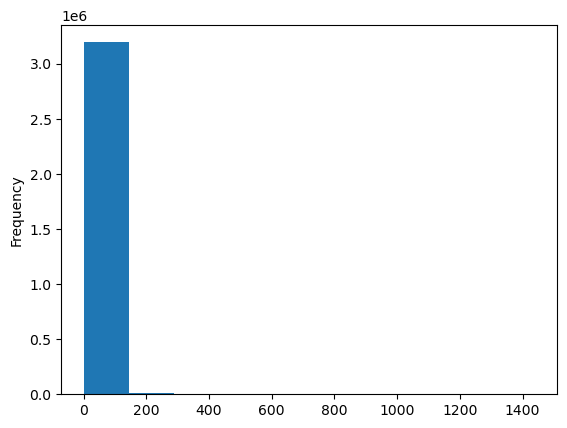

In [116]:
ax = dfdataally['tripduration(min)'].plot.hist()

In [117]:
# reference  https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/
conditions = [(dfdataally['tripduration(min)']>=0)&(dfdataally['tripduration(min)']<2),(dfdataally['tripduration(min)']>=2)&(dfdataally['tripduration(min)']<30),(dfdataall['tripduration(min)']>=30)&(dfdataall['tripduration(min)']<120),(dfdataall['tripduration(min)']>=120)&(dfdataall['tripduration(min)']<1440)]
values = ['0-2min','2min-30min','30min-2hr','2hr-1day']
dfdataally['triplength'] = np.select(conditions,values)
dfdataally.head()

,ride_id,rideable_type,year,month,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,tripduration,hour,tripduration(min),triplength
0,24722 2015-09-21 14:53:16,24722,2015,9,2015-09-21 14:53:16,2015-09-21 14:54:17,City Hall,3185,City Hall,3185,40.717732,-74.043845,40.717732,-74.043845,member,61,14,1.0,0-2min
1,24388 2015-09-21 14:55:59,24388,2015,9,2015-09-21 14:55:59,2015-09-21 15:00:50,Exchange Place,3183,Warren St,3187,40.716247,-74.033459,40.721124,-74.038051,casual,290,14,5.0,2min-30min
2,24442 2015-09-21 14:56:14,24442,2015,9,2015-09-21 14:56:14,2015-09-21 15:09:21,Exchange Place,3183,Exchange Place,3183,40.716247,-74.033459,40.716247,-74.033459,member,786,14,13.0,2min-30min
3,24678 2015-09-21 14:58:35,24678,2015,9,2015-09-21 14:58:35,2015-09-21 15:06:32,Hamilton Park,3203,Hamilton Park,3203,40.727596,-74.044247,40.727596,-74.044247,member,477,14,8.0,2min-30min
4,24574 2015-09-21 14:59:55,24574,2015,9,2015-09-21 14:59:55,2015-09-21 15:07:27,Hamilton Park,3203,Grove St PATH,3186,40.727596,-74.044247,40.719586,-74.043117,member,451,14,8.0,2min-30min


In [133]:
# dfdatabelowzero = dfdataall.loc[dfdataall['tripduration(min)']<0]
# len(dfdatabelowzero)

51

In [134]:
dfdatanope = dfdataally.loc[(dfdataall['tripduration(min)']>=0)&(dfdataally['tripduration(min)']<2)]
dfdatanope_member = dfdataally.loc[(dfdataally['tripduration(min)']>=0)&(dfdataally['tripduration(min)']<2)&(dfdataally['member_casual'] == 'member')]
dfdatanope_casual = dfdataally.loc[(dfdataall['tripduration(min)']>=0)&(dfdataally['tripduration(min)']<2)&(dfdataally['member_casual'] == 'casual')]
len(dfdatanope)

63766

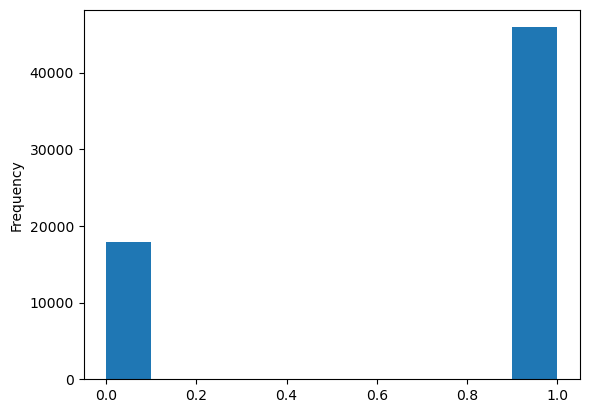

In [135]:
ax = dfdatanope['tripduration(min)'].plot.hist()

In [126]:
dfdatashort = dfdataally.loc[(dfdataally['tripduration(min)']>=2)&(dfdataally['tripduration(min)']<30)]
len(dfdatashort)

2902857

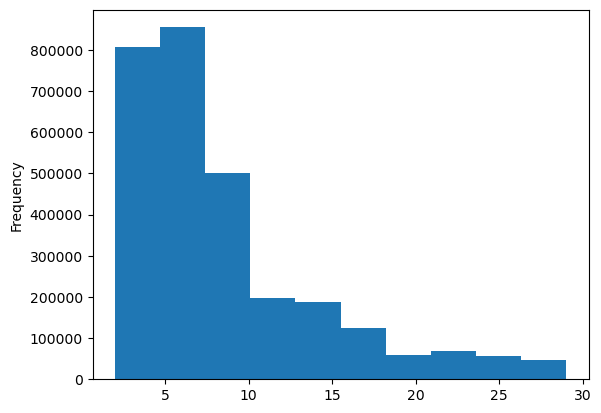

In [131]:
ax = dfdatashort['tripduration(min)'].plot.hist()

In [127]:
dfdatamed = dfdataally.loc[(dfdataally['tripduration(min)']>=30)&(dfdataally['tripduration(min)']<240)]
len(dfdatamed)

251917

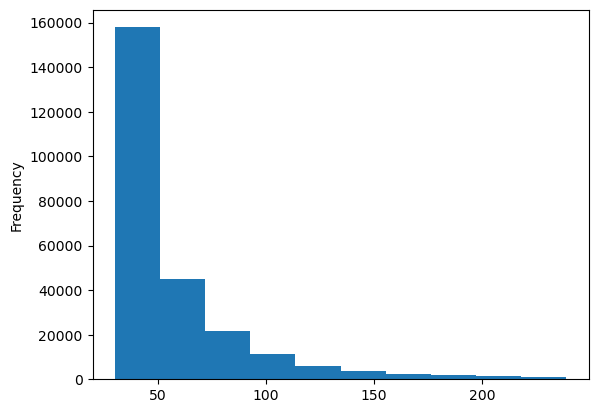

In [130]:
ax = dfdatamed['tripduration(min)'].plot.hist()

In [128]:
dfdatalong = dfdataally.loc[(dfdataally['tripduration(min)']>=240)&(dfdataally['tripduration(min)']<1440)]
len(dfdatalong)

8318

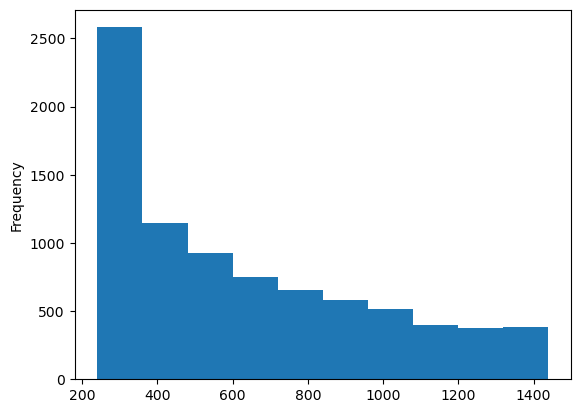

In [136]:
ax = dfdatalong['tripduration(min)'].plot.hist()

Unneeded code but keep for future reference

In [ ]:
# reference: create YYYYMM list
# not needed but cool loop: create YYYYMM list 
# lyyyymm  = []
# for y in range (2015,2023):
#     for m in range (1,13):
#         if m <10:
#             lyyyymm.append(f'{y}0{m}')
#         else:
#             lyyyymm.append(f'{y}{m}')

# print(lyyyymm)
# len(lyyyymm)
